In [2]:
import harpy
import spatialdata as sd
import spatialdata_plot
import matplotlib.pyplot as plt

/kyukon/data/gent/vo/000/gvo00070/vsc43257/harpy_figures/.venv/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
2025-05-08 17:15:57,867 - harpy.image._tiling - WARNING - 'jax' or 'basicpy' not installed, to use 'harpy.im.tiling_correction', please install these libraries.
/kyukon/data/gent/vo/000/gvo00070/vsc43257/harpy_figures/.venv/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)




Welcome to CellposeSAM, cellpose v4.0.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




/kyukon/data/gent/vo/000/gvo00070/vsc43257/harpy_figures/.venv/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [3]:
sdata_all = harpy.datasets.proteomics.macsima_tonsil()
sdata_all

version mismatch: detected: RasterFormatV02, requested: FormatV04
/kyukon/data/gent/vo/000/gvo00070/vsc43257/harpy_figures/.venv/lib/python3.12/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
version mismatch: detected: RasterFormatV02, requested: FormatV04
/kyukon/data/gent/vo/000/gvo00070/vsc43257/harpy_figures/.venv/lib/python3.12/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
version mismatch: detected: RasterFormatV02, requested: FormatV04
/kyukon/data/gent/vo/000/gvo00070/vsc43257/harpy_figures/.venv/lib/python3.12/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
version mismatch: detected: RasterFormatV02, requested: FormatV04
/kyukon/data/gent/v

SpatialData object
├── Images
│     ├── 'ROI1_image': DataArray[cyx] (20, 7794, 9437)
│     ├── 'ROI1_nuclei_image': DataArray[cyx] (15, 7794, 9437)
│     ├── 'ROI2_image': DataArray[cyx] (20, 5284, 6347)
│     ├── 'ROI2_nuclei_image': DataArray[cyx] (15, 5284, 6347)
│     ├── 'ROI3_image': DataArray[cyx] (20, 7794, 3311)
│     └── 'ROI3_nuclei_image': DataArray[cyx] (15, 7794, 3311)
└── Tables
      ├── 'ROI1_nuclei_table': AnnData (0, 15)
      ├── 'ROI1_table': AnnData (0, 41)
      ├── 'ROI2_nuclei_table': AnnData (0, 15)
      ├── 'ROI2_table': AnnData (0, 41)
      ├── 'ROI3_nuclei_table': AnnData (0, 15)
      └── 'ROI3_table': AnnData (0, 41)
with coordinate systems:
    ▸ 'ROI1', with elements:
        ROI1_image (Images), ROI1_nuclei_image (Images)
    ▸ 'ROI2', with elements:
        ROI2_image (Images), ROI2_nuclei_image (Images)
    ▸ 'ROI3', with elements:
        ROI3_image (Images), ROI3_nuclei_image (Images)

In [ ]:
## downsample image
img = sdata_all['ROI2_image'].coarsen(x=4, boundary='trim').mean().coarsen(y=4, boundary='trim').mean().compute()

In [ ]:
sdata = sd.SpatialData()
sdata['ROI2_image'] = sd.models.Image2DModel.parse(data=img, c_coords=img.coords['c'])

In [ ]:
import matplotlib as mpl
from cmap import Colormap
import numpy as np

cmap = mpl.cm.viridis
# bounds = [100, 150, 200]
norm = mpl.colors.Normalize(vmin=0.05, vmax=0.95, clip=True)

In [7]:
pure_red = Colormap(
    np.array([
        [0.0, 1.0, 0.0, 0.0, 1.0],
        [1.0, 1.0, 0.0, 0.0, 0.0],
    ])
)

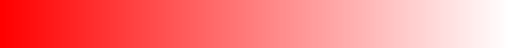

In [8]:
pure_red

In [9]:
from microfilm.colorify import cmaps_def

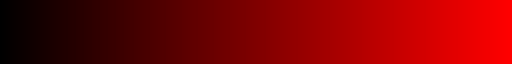

In [10]:
cmaps_def('pure_red')

In [ ]:
norm = mpl.colors.LogNorm()

In [ ]:
import matplotlib as mpl

cmap = mpl.cm.viridis
# bounds = [100, 150, 200]
norm = mpl.colors.LogNorm()

sdata.pl.render_images('ROI2_image', channel=['DAPI (1)', 'Ki 67'], norm=norm).pl.show()

In [ ]:
from microfilm.microplot import microshow

In [ ]:
microshow(img.sel(c=['DAPI (1)']))

In [ ]:
def plot_img(name='ROI1_image'):
    img = sdata_all[name].coarsen(x=4, boundary='trim').mean().coarsen(y=4, boundary='trim').mean().compute()
    marker_list = {
    "All": ["DAPI (1)", "Cytokeratin", "CD45RO", "Ki 67", "CD8"],
    # "Immune": ["CD45RO", "CD4", "CD8", "Ki 67"],
    # "Epithelial": ["Cytokeratin", "Cytokeratin 19"],
    # "Macrophages": ["CD68"],
    # "Nuclei": ["DAPI (1)"],
    }

    cmaps = ['pure_blue', 'pure_cyan', 'pure_red', 'pure_yellow', 'pure_green']
    for kind, markers in marker_list.items():
        print(f"{kind}: {markers}")
        # Create a new figure
        microshow(
            img.sel(c=markers), limits=[np.percentile(img.sel(c=m), [1, 99]) for m in markers], channel_names=markers, cmaps=cmaps, label_font_size=1, scalebar_font_size=5, fig_scaling=8, channel_label_type='in_fig', channel_label_show=True, dpi=300,
            unit='um', scalebar_unit_per_pix=0.17, scalebar_size_in_units=10)
        plt.show()


In [ ]:
plot_img('ROI2_image')

In [ ]:
marker_list = {
    "All": ["DAPI (1)", "Cytokeratin", "CD45RO", "Ki 67", "CD8"],
    # "Immune": ["CD45RO", "CD4", "CD8", "Ki 67"],
    # "Epithelial": ["Cytokeratin", "Cytokeratin 19"],
    # "Macrophages": ["CD68"],
    # "Nuclei": ["DAPI (1)"],
}

cmaps = ['pure_blue', 'pure_cyan', 'pure_red', 'pure_yellow', 'pure_green']

In [ ]:
np.percentile(img.sel(c='DAPI (1)'), [1, 99])

In [ ]:
for kind, markers in marker_list.items():
    print(f"{kind}: {markers}")
    # Create a new figure
    microshow(
        img.sel(c=markers), limits=[np.percentile(img.sel(c=m), [1, 99]) for m in markers], channel_names=markers, cmaps=cmaps, label_font_size=1, scalebar_font_size=5, fig_scaling=8, channel_label_type='in_fig', channel_label_show=True, dpi=300,
        unit='um', scalebar_unit_per_pix=0.21, scalebar_size_in_units=100)
    plt.show()


## Clustering



In [12]:
sample_name = 'ROI2'
img = sdata_all[sample_name + '_image'].coarsen(x=4, boundary='trim').mean().coarsen(y=4, boundary='trim').mean().compute()

In [13]:
sdata = sd.SpatialData()
sdata[sample_name + '_image'] = sd.models.Image2DModel.parse(data=img.data, c_coords=img.coords['c'], transformations={sample_name: sd.transformations.Identity()})
sdata

INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           


SpatialData object
└── Images
      └── 'ROI2_image': DataArray[cyx] (20, 1321, 1586)
with coordinate systems:
    ▸ 'ROI2', with elements:
        ROI2_image (Images)

In [14]:
# channels = ["DAPI (1)", "Cytokeratin", "CD45RO", "Ki 67", "CD8"]

sdata = harpy.im.pixel_clustering_preprocess(
    sdata,
    img_layer=[sample_name + "_image"],
    output_layer=[sample_name + "_processed_image"],
    chunks=2048,
    persist_intermediate=True,  # set to False if you have multiple images, and if they are large.
    overwrite=True,
    sigma=2.0,
)

2025-05-08 17:19:05,057 - harpy.image._manager - INFO - Writing results to layer 'ROI2_processed_image'


In [15]:
import flowsom as fs
from dask.distributed import Client, LocalCluster

work_with_client = False

if work_with_client:
    # client example
    cluster = LocalCluster(
        n_workers=1,
        threads_per_worker=10,
    )

    client = Client(cluster)
else:
    client = None

batch_model = fs.models.BatchFlowSOMEstimator

sdata, fsom, mapping = harpy.im.flowsom(
    sdata,
    img_layer=[sample_name + "_processed_image"],
    output_layer_clusters=[
        sample_name + "_flowsom_clusters",
    ],  # we need output_cluster_layer and output_meta_cluster_layer --> these will both be labels layers
    output_layer_metaclusters=[
        sample_name + "_flowsom_metaclusters",
    ],
    n_clusters=10,
    random_state=111,
    chunks=512,
    client=client,
    model=batch_model,
    num_batches=10,
    xdim=10,
    ydim=10,
    z_score=True,
    z_cap=3,
    persist_intermediate=True,
    overwrite=True,
)

2025-05-08 17:19:05,066 - harpy.image.pixel_clustering._clustering - INFO - Extracting random sample for FlowSOM training.
2025-05-08 17:19:05,073 - harpy.image.pixel_clustering._clustering - INFO - Start sampling
2025-05-08 17:19:05,801 - harpy.image.pixel_clustering._clustering - INFO - Start FlowSOM training.
/kyukon/data/gent/vo/000/gvo00070/vsc43257/harpy_figures/.venv/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/kyukon/data/gent/vo/000/gvo00070/vsc43257/harpy_figures/.venv/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities 

In [16]:
sdata = harpy.tb.cluster_intensity(
    sdata,
    mapping=mapping,
    img_layer=[sample_name + "_processed_image"],
    labels_layer=[sample_name + "_flowsom_clusters"],
    to_coordinate_system=[sample_name],
    output_layer="counts_clusters",
    overwrite=True,
)

2025-05-08 17:19:21,786 - harpy.table.pixel_clustering._cluster_intensity - INFO - Start allocation of intensities of image layer with name 'ROI2_processed_image' by labels in labels layer with name 'ROI2_flowsom_clusters'.


/kyukon/data/gent/vo/000/gvo00070/vsc43257/harpy_figures/.venv/lib/python3.12/site-packages/harpy/table/_allocation_intensity.py:286: ImplicitModificationWarning: Setting element `.obsm['spatial']` of view, initializing view as actual.
  adata.obsm[_SPATIAL] = coordinates
2025-05-08 17:19:28,451 - harpy.table.pixel_clustering._cluster_intensity - INFO - End allocation of image layer with name 'ROI2_processed_image' and labels layer with name 'ROI2_flowsom_clusters'.
2025-05-08 17:19:28,452 - harpy.table.pixel_clustering._cluster_intensity - INFO - Start preprocessing.
2025-05-08 17:19:28,454 - harpy.table._preprocess - INFO - Calculating cell size from provided labels_layer 'ROI2_flowsom_clusters'
/kyukon/data/gent/vo/000/gvo00070/vsc43257/harpy_figures/.venv/lib/python3.12/site-packages/spatialdata/models/models.py:1144: UserWarning: Converting `region_key: fov_labels` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/kyukon/data/gent/vo/000/gvo00070/vsc43257

In [17]:
sdata

SpatialData object
├── Images
│     ├── 'ROI2_image': DataArray[cyx] (20, 1321, 1586)
│     └── 'ROI2_processed_image': DataArray[cyx] (20, 1321, 1586)
├── Labels
│     ├── 'ROI2_flowsom_clusters': DataArray[yx] (1321, 1586)
│     └── 'ROI2_flowsom_metaclusters': DataArray[yx] (1321, 1586)
└── Tables
      └── 'counts_clusters': AnnData (100, 20)
with coordinate systems:
    ▸ 'ROI2', with elements:
        ROI2_image (Images), ROI2_processed_image (Images), ROI2_flowsom_clusters (Labels), ROI2_flowsom_metaclusters (Labels)

/kyukon/data/gent/vo/000/gvo00070/vsc43257/harpy_figures/.venv/lib/python3.12/site-packages/spatialdata_plot/pl/utils.py:777: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)
/kyukon/data/gent/vo/000/gvo00070/vsc43257/harpy_figures/.venv/lib/python3.12/site-packages/spatialdata_plot/pl/utils.py:777: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


<Axes: title={'center': 'ROI2'}>

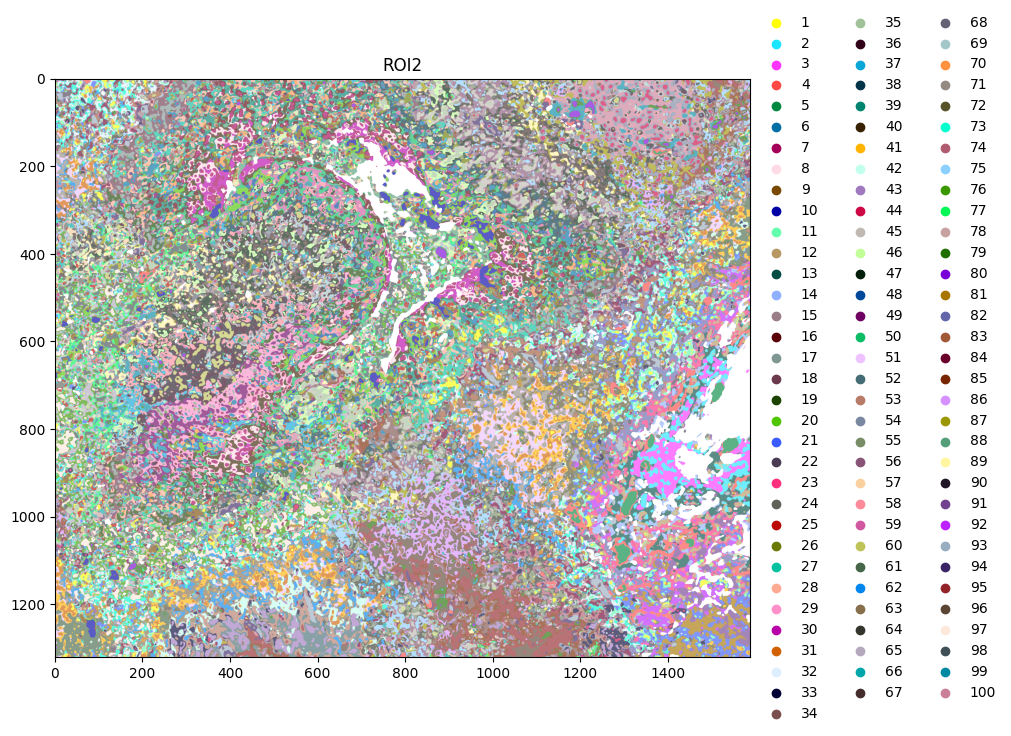

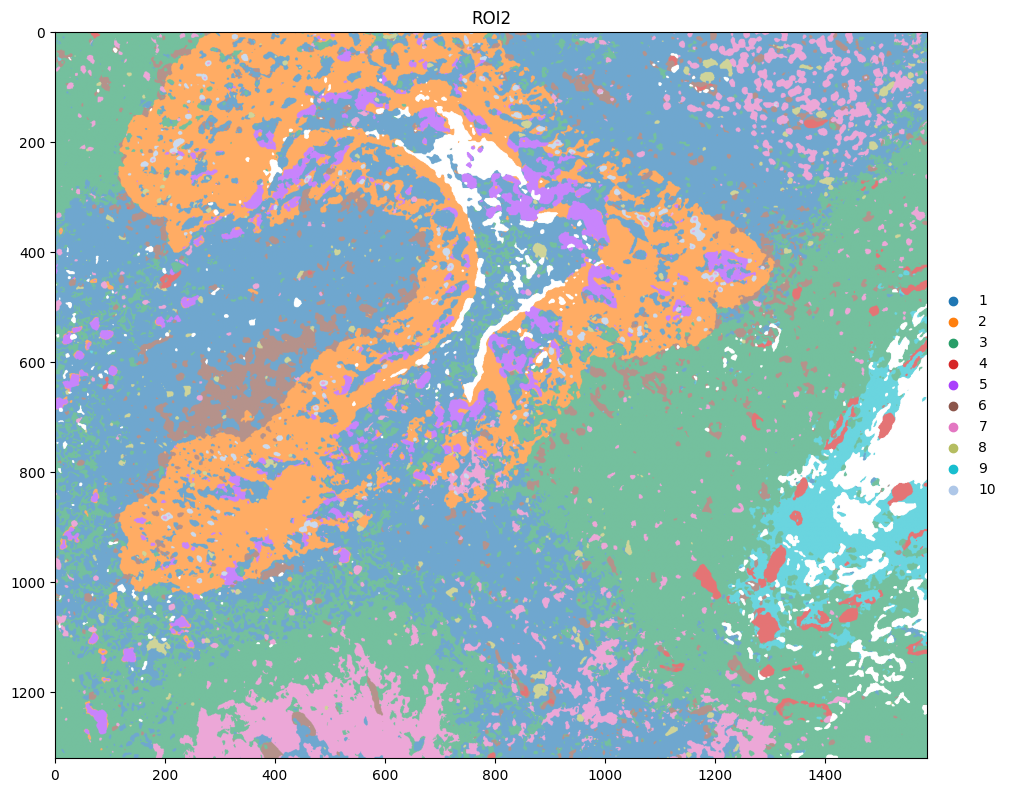

In [18]:
harpy.pl.pixel_clusters(
    sdata,
    labels_layer=sample_name + "_flowsom_clusters",
    figsize=(10, 10),
    to_coordinate_system=sample_name,
    render_labels_kwargs={"alpha": 1},
)

harpy.pl.pixel_clusters(
    sdata,
    labels_layer=sample_name + "_flowsom_metaclusters",
    figsize=(10, 10),
    to_coordinate_system=sample_name,
    render_labels_kwargs={"alpha": 1},
)


In [19]:
sdata

SpatialData object
├── Images
│     ├── 'ROI2_image': DataArray[cyx] (20, 1321, 1586)
│     └── 'ROI2_processed_image': DataArray[cyx] (20, 1321, 1586)
├── Labels
│     ├── 'ROI2_flowsom_clusters': DataArray[yx] (1321, 1586)
│     └── 'ROI2_flowsom_metaclusters': DataArray[yx] (1321, 1586)
└── Tables
      └── 'counts_clusters': AnnData (100, 20)
with coordinate systems:
    ▸ 'ROI2', with elements:
        ROI2_image (Images), ROI2_processed_image (Images), ROI2_flowsom_clusters (Labels), ROI2_flowsom_metaclusters (Labels)